RFM ANALYSIS OF ECOMMERCE BEHAVIOR DATA
RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to identify and categorize customers based on their purchasing behavior.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify


In [2]:
data_oct = pd.read_csv(r'C:\Users\ranu1\Downloads\E-comercedataset\2019-Oct.csv')
data_oct

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2.103810e+18,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2.053010e+18,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2.053010e+18,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
1048570,2019-10-01 17:27:36 UTC,view,1005105,2.053010e+18,electronics.smartphone,apple,1415.48,537482499,60b0e052-920c-4469-9627-952aa88d0b16
1048571,2019-10-01 17:27:37 UTC,view,2601292,2.053010e+18,NaN,gefest,47.62,553278643,97ca518d-44df-4fca-8081-4d2d95b85607
1048572,2019-10-01 17:27:37 UTC,view,3601241,2.053010e+18,appliances.kitchen.washer,lg,350.70,552637214,18f1b24c-dae4-4d7a-a470-3f78c6b15533
1048573,2019-10-01 17:27:37 UTC,view,1004754,2.053010e+18,electronics.smartphone,honor,257.38,542200836,fe582251-252a-4b79-af15-7c5c5ce8c6f1


In [3]:
data_nov = pd.read_csv(r'C:\Users\ranu1\Downloads\E-comercedataset\2019-Nov.csv')
data_nov.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [4]:
#Column event type have view, cart and purchase but we need purchase data only
data_oct=data_oct.loc[data_oct.event_type == 'purchase']
data_nov=data_nov.loc[data_nov.event_type == 'purchase']

In [5]:
#then union october and november data
frames = [data_oct, data_nov]
data=pd.concat(frames)

In [6]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2.053010e+18,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2.053010e+18,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2.053010e+18,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2.053010e+18,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2.053010e+18,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [7]:
%%time
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_convert(None)

CPU times: total: 7.39 s
Wall time: 9.2 s


In [8]:
data.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id             float64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [9]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,1004856,2.053010e+18,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,1002532,2.053010e+18,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02,purchase,5100816,2.053010e+18,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07,purchase,13800054,2.053010e+18,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,4804055,2.053010e+18,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
67501725,2019-11-30 23:58:14,purchase,1004874,2.053014e+18,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
67501745,2019-11-30 23:58:22,purchase,1005130,2.053014e+18,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
67501824,2019-11-30 23:58:57,purchase,1004767,2.053014e+18,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0
67501863,2019-11-30 23:59:15,purchase,3701309,2.053014e+18,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [10]:
#we can see that each session is equal to 1 transaction
#in terms of sessions being multiples with every product 
#sold so we need to merge every session together

data = data.groupby(by='user_session').agg(
    Date_order=('event_time', 'max'),
    user_id=('user_id', 'first'),
    Quantity=('user_session', 'count'),
    money_spent=('price', 'sum')
).reset_index(drop=True)

data

,Date_order,user_id,Quantity,money_spent
0,2019-11-02 08:35:35,563180871,1,123.55
1,2019-11-11 03:35:34,566954797,1,151.61
2,2019-11-20 14:15:42,573583583,1,138.23
3,2019-11-17 05:52:39,516763048,1,795.90
4,2019-11-09 08:57:03,566729291,1,351.10
...,...,...,...,...
787902,2019-11-18 11:20:56,519523637,1,45.03
787903,2019-11-17 10:59:07,523658055,1,32.15
787904,2019-11-25 10:56:59,518862395,2,163.19
787905,2019-11-17 05:52:00,571263795,2,66.64


RFM ANALYSIS

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?
Frequency – How often do they purchase?
Monetary Value – How much do they spend

so we will make that 3 attribute Recency, Frequency, and Monetary

In [11]:
data['Date_order'].max()

#the last date we have is 2019-11-30 so we
#will use date 2019-12-1 as reference 

Timestamp('2019-11-30 23:59:44')

In [12]:

import pandas as pd
import numpy as np
import datetime as dt

study_date = dt.datetime(2019, 12, 1)
data = pd.DataFrame(data)

# Calculate the time difference between the study date and the last purchase
data['last_purchase'] = study_date - data['Date_order']

# Convert the 'last_purchase' column to the number of days
data['last_purchase'] = data['last_purchase'].dt.days

# Display the first few rows
data.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-11-02 08:35:35,563180871,1,123.55,28
1,2019-11-11 03:35:34,566954797,1,151.61,19
2,2019-11-20 14:15:42,573583583,1,138.23,10
3,2019-11-17 05:52:39,516763048,1,795.90,13
4,2019-11-09 08:57:03,566729291,1,351.10,21


In [13]:
#Calculate Recency, Frequency, and Monetary of the data
RFM= data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
138340325,19,1,93.50
225644257,18,1,40.91
253299396,24,1,246.85
256164170,10,1,113.23
267316896,16,1,189.71


In [14]:
#FREQUENCY
RFM['Frequency'].describe()

count    450430.000000
mean          1.749233
std           2.159559
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         181.000000
Name: Frequency, dtype: float64

In [15]:
#RECENCY
RFM['Recency'].describe()

count    450430.000000
mean         13.917181
std          10.132094
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max          60.000000
Name: Recency, dtype: float64

RFM segmentation is a useful tool for identifying groups of clients who should be given extra attention. RFM segmentation enables marketers to target specific groups of customers with communications that are far more relevant to their unique behaviors, resulting in improved response rates, enhanced loyalty, and increased customer lifetime value. RFM segmentation is a method for segmenting data, just like other approaches.

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [16]:
#RFM QUARTILES
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,7.0,1.0,108.63
0.50,13.0,1.0,246.23
0.75,19.0,2.0,617.21


In [17]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 7.0, 0.5: 13.0, 0.75: 19.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 108.63, 0.5: 246.23, 0.75: 617.21}}

In [18]:
#FOR RECENCY
def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [19]:
   
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,19,1,93.50,3,4,4,344,11
225644257,18,1,40.91,3,4,4,344,11
253299396,24,1,246.85,4,4,2,442,10
256164170,10,1,113.23,2,4,3,243,9
267316896,16,1,189.71,3,4,3,343,10


In [20]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
138340325,19,1,93.50,3,4,4,344,11,Lost
225644257,18,1,40.91,3,4,4,344,11,Lost
253299396,24,1,246.85,4,4,2,442,10,Lost
256164170,10,1,113.23,2,4,3,243,9,Hibernating
267316896,16,1,189.71,3,4,3,343,10,Lost


In [21]:
import pickle

# Assuming you've already calculated the RFM metrics as shown in your code
# Save the RFM DataFrame to a pickle file
with open('rfm_data.pkl', 'wb') as file:
    pickle.dump(RFM, file)

print("RFM DataFrame saved to 'rfm_data.pkl'")


RFM DataFrame saved to 'rfm_data.pkl'


In [22]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep        10.8       1.5    646.4   48781
Can’t Lose Them       11.2       1.2    392.5   62730
Champions              2.5       6.8   3334.9   21844
Hibernating           12.9       1.1    292.2   82245
Lost                  21.5       1.0    131.0  142196
Loyal Customers        7.4       3.8   1734.7   26977
Potential Loyalist     9.5       2.8   1063.0   30492
Promising             10.6       2.1    850.2   35165


C:\Users\ranu1\AppData\Local\Temp\ipykernel_6872\3348507138.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Segment', data=rfm_labels, palette='viridis', orient='h')


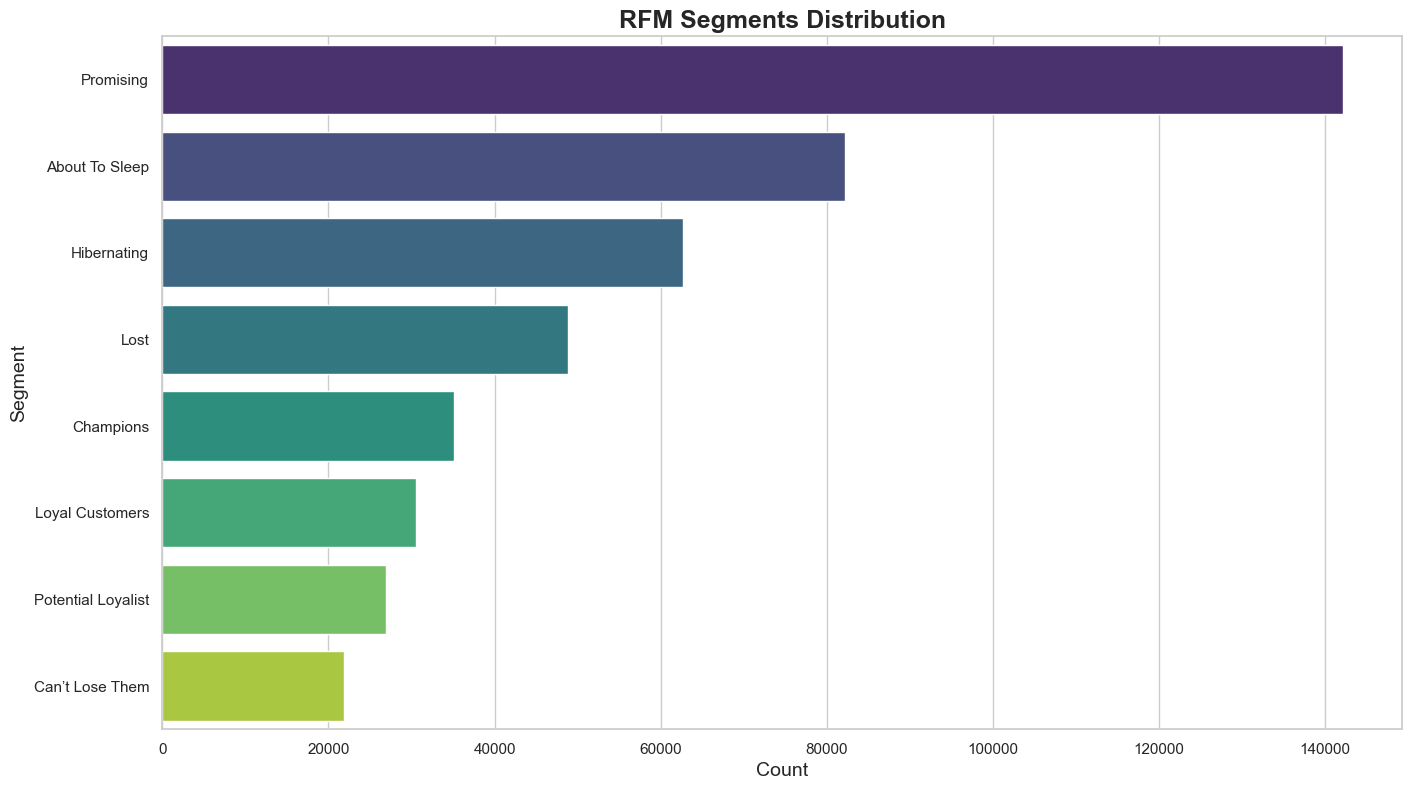

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the columns directly (assuming RFM_desc is already defined)
RFM_desc.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

# Create a DataFrame to hold the labels and counts
rfm_labels = pd.DataFrame({
    'Segment': ['Lost', 'Hibernating', 'Can’t Lose Them', 'About To Sleep', 
                'Promising', 'Potential Loyalist', 'Loyal Customers', 'Champions'],
    'Count': RFM_desc['Count']
})

# Sort the data by count for better visualization
rfm_labels = rfm_labels.sort_values('Count', ascending=False)

# Set the plot size and style
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

# Plot a bar chart
sns.barplot(x='Count', y='Segment', data=rfm_labels, palette='viridis', orient='h')

# Add the title and labels
plt.title("RFM Segments Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Count", fontsize=14)
plt.ylabel("Segment", fontsize=14)

# Show the plot
plt.show()


<Figure size 1600x900 with 0 Axes>

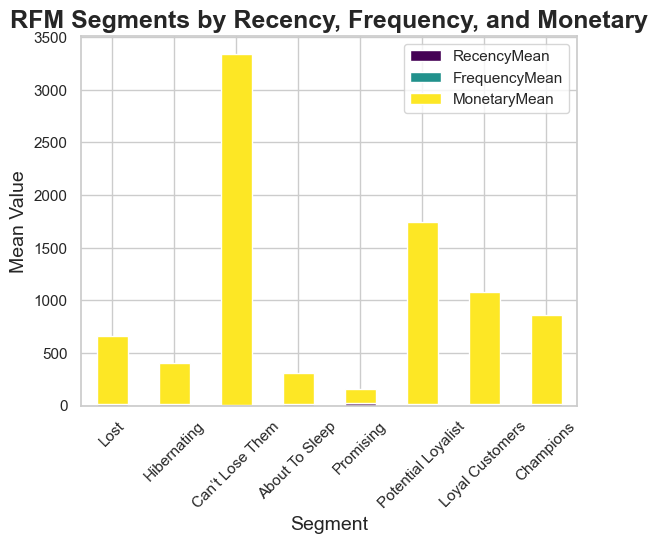

In [24]:
# Prepare data for the stacked bar chart
rfm_labels = RFM_desc.copy()
rfm_labels['Segment'] = ['Lost', 'Hibernating', 'Can’t Lose Them', 'About To Sleep', 
                         'Promising', 'Potential Loyalist', 'Loyal Customers', 'Champions']

# Set the plot size
plt.figure(figsize=(16, 9))

# Plot a stacked bar chart
rfm_labels.set_index('Segment')[['RecencyMean', 'FrequencyMean', 'MonetaryMean']].plot(kind='bar', stacked=True, colormap='viridis')

# Add the title and labels
plt.title("RFM Segments by Recency, Frequency, and Monetary", fontsize=18, fontweight="bold")
plt.xlabel("Segment", fontsize=14)
plt.ylabel("Mean Value", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [25]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming RFM is your DataFrame and it has a column 'RFM_score'

# Using KMeans to cluster the RFM_scores
kmeans = KMeans(n_clusters=5, random_state=42)  # Define number of clusters
RFM['Cluster'] = kmeans.fit_predict(RFM[['RFM_score']])

# Check the cluster assignment
RFM.head(30)

# You can now analyze the clusters


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label,Cluster
user_id,,,,,,,,,,
138340325,19,1,93.50,3,4,4,344,11,Lost,0
225644257,18,1,40.91,3,4,4,344,11,Lost,0
253299396,24,1,246.85,4,4,2,442,10,Lost,0
256164170,10,1,113.23,2,4,3,243,9,Hibernating,2
267316896,16,1,189.71,3,4,3,343,10,Lost,0
276604124,18,1,7.18,3,4,4,344,11,Lost,0
282274853,22,1,79.15,4,4,4,444,12,Lost,0
296197073,0,2,61.52,1,2,4,124,7,About To Sleep,1
299358698,21,1,154.19,4,4,3,443,11,Lost,0


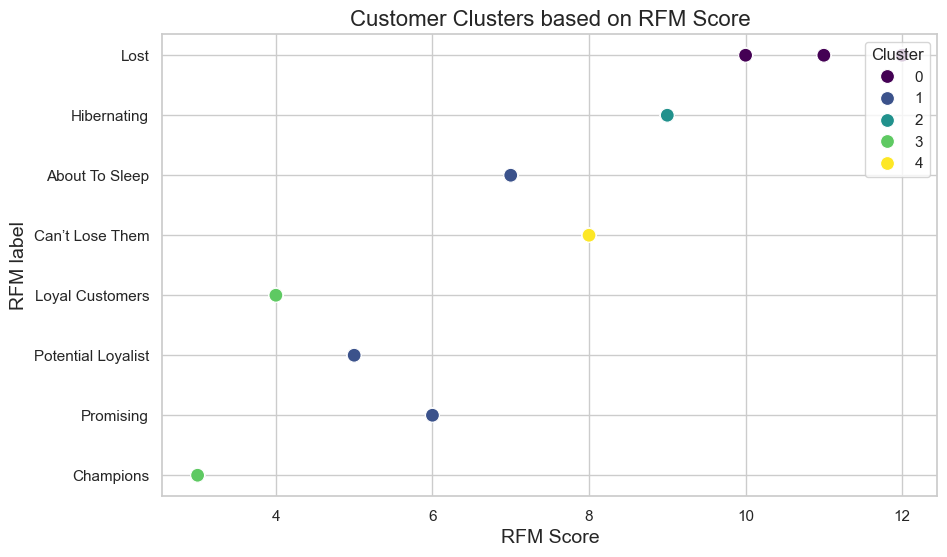

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of RFM Score vs Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM, x='RFM_score', y='RFM_label', hue='Cluster', palette='viridis', s=100)

# Adding plot labels and title
plt.title('Customer Clusters based on RFM Score', fontsize=16)
plt.xlabel('RFM Score', fontsize=14)
plt.ylabel('RFM label', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.show()


C:\Users\ranu1\AppData\Local\Temp\ipykernel_6872\3663705019.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


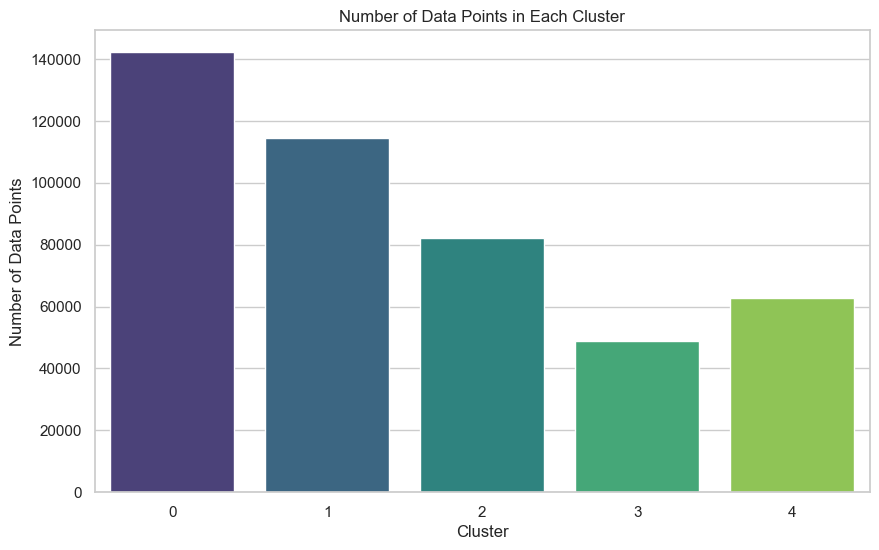

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points in each cluster
cluster_counts = RFM['Cluster'].value_counts().sort_index()

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


In [28]:
RFM['Churn'] = (RFM['RFM_score'] < 5).astype(int)

Confusion Matrix:
[[120689      0]
 [     0  14440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120689
           1       1.00      1.00      1.00     14440

    accuracy                           1.00    135129
   macro avg       1.00      1.00      1.00    135129
weighted avg       1.00      1.00      1.00    135129



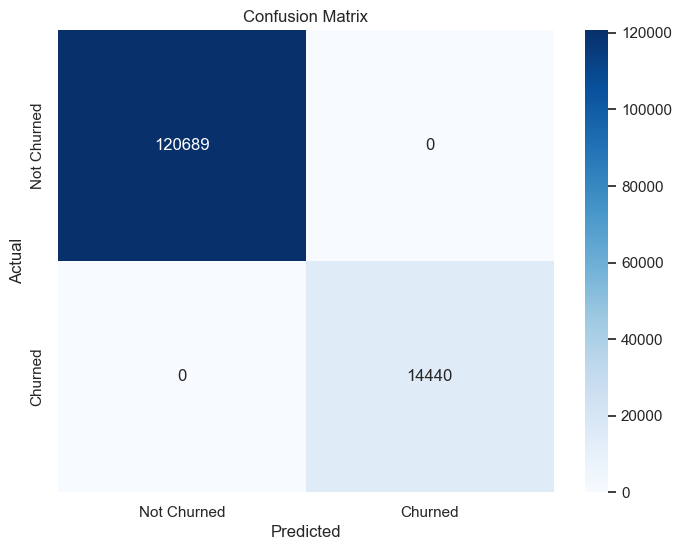

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming RFM DataFrame already has the cluster assignments
# and a column named 'Churn' indicating whether the customer has churned

# Prepare the data
X = RFM[['Cluster']]  # Features (cluster assignments)
y = RFM['Churn']      # Target variable (churn)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Index(['Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'RFM_segmentation', 'RFM_score', 'RFM_label', 'Cluster',
       'Churn'],
      dtype='object')


C:\Users\ranu1\AppData\Local\Temp\ipykernel_6872\4151548283.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RFM_label_encoded'] = label_encoder.fit_transform(X['RFM_label'])


Confusion Matrix:
[[120689      0]
 [     0  14440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120689
           1       1.00      1.00      1.00     14440

    accuracy                           1.00    135129
   macro avg       1.00      1.00      1.00    135129
weighted avg       1.00      1.00      1.00    135129



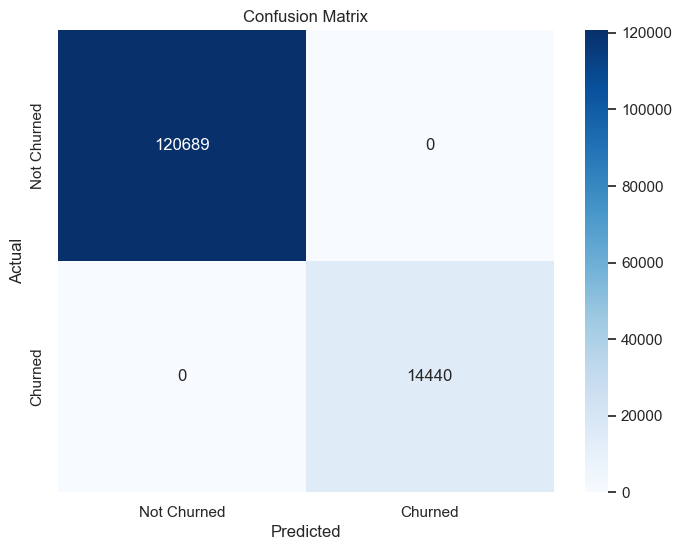

In [30]:
#RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print column names to check for 'Churn'
print(RFM.columns)

# Prepare the data
X = RFM[['Cluster', 'RFM_label']]  # Features
y = RFM['Churn']                  # Target variable (churn)

# Convert categorical features into numeric format
label_encoder = LabelEncoder()

# Encode 'RFM_label'
X['RFM_label_encoded'] = label_encoder.fit_transform(X['RFM_label'])
X = X.drop(columns=['RFM_label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
#CONCLUSION

Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

Champions : Reward them. Can be early adopters of new products. Will promote the brand. Most likely to send referrals.

Loyal Customer : Upsell higher value products. Ask for reviews.

Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.

Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.

About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.

Can't Lose Them : Provide helpful resources on the site. Send personalised emails.

Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.

Lost : Revive interest with reach out campaign. Ignore otherwise.